<a href="https://colab.research.google.com/github/alexander-toschev/cv-course/blob/main/FD_PointsAndPatches_HARRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Harris Corner Detection

One early attempt to find these corners was done by Chris Harris & Mike Stephens in their paper A Combined Corner and Edge Detector in 1988, so now it is called Harris Corner Detector. He took this simple idea to a mathematical form. It basically finds the difference in intensity for a displacement of (u,v) in all directions. This is expressed as below:

E(u,v) = $\sum_{x,y} \underbrace{w(x,y)}_\text{window function} \, [\underbrace{I(x+u,y+v)}_\text{shifted intensity}-\underbrace{I(x,y)}_\text{intensity}]^2$

Window function is either a rectangular window or gaussian window which gives weights to pixels underneath.

The first step is to convert the grayscale image into an image of edges. There are many techniques to do this, but the cv2 uses a filter called Sobel's kernel, which gets cross-correlated with the original image. The ksize parameter determines the size of the Sobel kernel (3x3, 5x5, etc..). As the size increases, more pixels are part of each convolution process and the edges will get more blurry.

We have to maximize this function E(u,v) for corner detection. That means, we have to maximize the second term. Applying Taylor Expansion to above equation and using some mathematical steps (please refer any standard text books you like for full derivation), we get the final equation as:

$E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}$

where

$M = \sum_{x,y} w(x,y)  \begin{bmatrix}I_x I_x & I_x I_y \\ I_x I_y & I_y I_y \end{bmatrix}$

Structure tensor setup - Basically we construct a matrix M which represents the direction of the gradients (edges) at every point of the image. This matrix can then be used to determine which of the edge pixels are corners.

Here, $I_x$ and $I_y$ are image derivatives in x and y directions respectively. (Can be easily found out using cv2.Sobel()).

Then comes the main part. After this, they created a score, basically an equation, which will determine if a window can contain a corner or not.

Harris response calculation - In this step, we calculate the "corner score" R of each edge pixel. The idea is that a pixel is defined as a corner only if it has big gradients in 2 perpendicular directions, which means the M matrix has 2 big eigenvalues (1 big eigenvalue will simply be an edge). Here we can see Harris detector's free parameter - k. It is an empirically determined constant in the range [0.04,0.06]:

$R = det(M) - k(trace(M))^2$

where
$det(M) = \lambda_1 \lambda_2$

$trace(M) = \lambda_1 + \lambda_2$

$\lambda_1$ and $\lambda_2$ are the eigen values of M

So the values of these eigen values decide whether a region is corner, edge or flat.

When |R| is small, which happens when $\lambda_1$ and $\lambda_2$ are small, the region is flat.

When R<0, which happens when $\lambda_1 >> \lambda_2$ or vice versa, the region is edge.

When R is large, which happens when $\lambda_1$ and $\lambda_2$ are large and $\lambda_1$ $\sim$ $\lambda_2$, the region is a corner.

The _k_ parameter lets you influence in this step, trading off precision and recall. So with a bigger k, you will get less false corners but you will also miss more real corners (high precision), with a smaller k you will get a lot more corners, so you will miss less true corners, but get a lot of false ones (high recall).



OpenCV has the function cv2.cornerHarris() for this purpose. Its arguments are :

img - Input image, it should be grayscale and float32 type.

blockSize - It is the size of neighbourhood considered for corner detection

ksize - Aperture parameter of Sobel derivative used.

k - Harris detector free parameter in the equation.


In [5]:
#!wget https://w7.pngwing.com/pngs/710/895/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png
import cv2
import numpy as np
import numpy as np
import cv2
import sys
#import dlib
from PIL import Image
import cv2
#import dlib
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
!wget https://w7.pngwing.com/pngs/710/895/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png

dyld[48683]: Library not loaded: /opt/homebrew/opt/libunistring/lib/libunistring.2.dylib
  Referenced from: <A2808CD2-467C-32EF-B7CF-9441D98ABF5E> /opt/homebrew/Cellar/wget/1.21.3/bin/wget
  Reason: tried: '/opt/homebrew/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/opt/homebrew/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/libunistring/1.1/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/Cellar/libunistring/1.1/lib/libunistring.2.dylib' (no such file), '/opt/homebrew/Cellar/libunistring/1.1/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


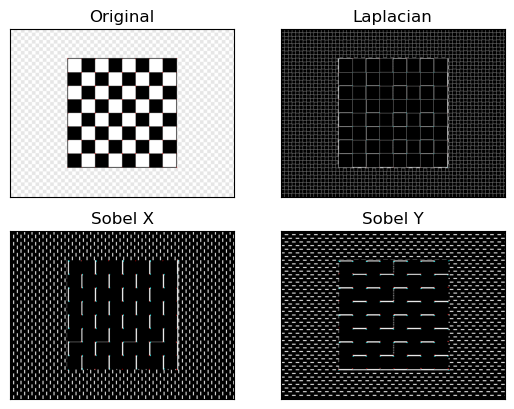

In [14]:


filename = 'content/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
#dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]
# sobel

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)


plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# Corner with SubPixel Accuracy

Sometimes, you may need to find the corners with maximum accuracy. OpenCV comes with a function cv2.cornerSubPix() which further refines the corners detected with sub-pixel accuracy. Below is an example. As usual, we need to find the harris corners first. Then we pass the centroids of these corners (There may be a bunch of pixels at a corner, we take their centroid) to refine them. Harris corners are marked in red pixels and refined corners are marked in green pixels. For this function, we have to define the criteria when to stop the iteration. We stop it after a specified number of iteration or a certain accuracy is achieved, whichever occurs first. We also need to define the size of neighbourhood it would search for corners.

In [19]:
plt.rcParams['figure.figsize'] = [100, 50]
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
print(corners)

# Now draw them
res = np.hstack((centroids,corners))

res = np.int0(res)

#img[res[:,1],res[:,0]]=[255,0,0]
#img[res[:,3],res[:,2]] = [0,255,0]
cv2.drawKeypoints(gray,corners, img)
plt.imshow(img)
plt.show()

[[460.31763  344.33627 ]
 [235.98947  119.98123 ]
 [685.3616   119.26617 ]
 [293.05652  120.03964 ]
 [349.6312   120.03446 ]
 [404.0272   120.127625]
 [460.58664  120.089516]
 [514.8552   120.17242 ]
 [571.7188   120.06855 ]
 [626.4391   120.01474 ]
 [235.9866   177.01686 ]
 [293.45807  177.51079 ]
 [349.00027  177.50009 ]
 [404.52716  177.4716  ]
 [460.22424  177.49083 ]
 [515.6399   177.50595 ]
 [571.35406  177.503   ]
 [626.68933  177.50958 ]
 [684.33417  178.1448  ]
 [293.49307  233.10889 ]
 [348.9993   233.11732 ]
 [404.497    233.11983 ]
 [460.27582  233.10805 ]
 [515.6233   233.12099 ]
 [571.37274  233.09778 ]
 [626.6709   233.10211 ]
 [684.39325  232.28828 ]
 [235.91786  233.81062 ]
 [235.98238  288.12433 ]
 [293.45483  288.5453  ]
 [348.9555   288.52707 ]
 [404.48     288.54608 ]
 [460.16602  288.55338 ]
 [515.6348   288.52667 ]
 [571.3585   288.52338 ]
 [626.7302   288.51614 ]
 [684.3783   289.41986 ]
 [293.49042  344.32443 ]
 [349.00195  344.3307  ]
 [404.49792  344.33313 ]


/var/folders/49/7n60k7011n11zcdptxxpmvvh0000gn/T/ipykernel_43619/2143124646.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'drawKeypoints'
> Overload resolution failed:
>  - Can't parse 'keypoints'. Sequence item with index 0 has a wrong type
>  - Can't parse 'keypoints'. Sequence item with index 0 has a wrong type


# Задание 1
Реализовать метод при помощи Numpy